In [7]:
# importing the libraries

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#reading the dataset
df = pd.read_csv('birth.csv')

In [9]:
df.head(10)

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit,marital,whitemom
0,34.0,34,younger mom,37,full term,14.0,28.0,6.96,not low,male,nonsmoker,married,white
1,36.0,31,younger mom,41,full term,12.0,41.0,8.86,not low,female,nonsmoker,married,white
2,37.0,36,mature mom,37,full term,10.0,28.0,7.51,not low,female,nonsmoker,married,not white
3,NaN,16,younger mom,38,full term,NaN,29.0,6.19,not low,male,nonsmoker,not married,white
4,32.0,31,younger mom,36,premie,12.0,48.0,6.75,not low,female,nonsmoker,married,white
5,32.0,26,younger mom,39,full term,14.0,45.0,6.69,not low,female,nonsmoker,married,white
6,37.0,36,mature mom,36,premie,10.0,20.0,6.13,not low,female,nonsmoker,married,white
7,29.0,24,younger mom,40,full term,13.0,65.0,6.74,not low,male,nonsmoker,not married,white
8,30.0,32,younger mom,39,full term,15.0,25.0,8.94,not low,female,nonsmoker,married,white
9,29.0,26,younger mom,39,full term,11.0,22.0,9.12,not low,male,nonsmoker,not married,not white


In [10]:
df.describe(include = "all")

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit,marital,whitemom
count,886.000000,1000.000000,1000,1000.000000,1000,944.000000,958.000000,1000.000000,1000,1000,981,1000,1000
unique,NaN,NaN,2,NaN,2,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,younger mom,NaN,full term,NaN,NaN,NaN,not low,male,nonsmoker,married,white
freq,NaN,NaN,841,NaN,876,NaN,NaN,NaN,919,505,867,594,765
mean,31.133183,28.449000,NaN,38.666000,NaN,11.351695,30.425887,7.198160,NaN,NaN,NaN,NaN,NaN
std,7.058135,5.759737,NaN,2.564961,NaN,4.108192,15.242527,1.306775,NaN,NaN,NaN,NaN,NaN
min,15.000000,14.000000,NaN,21.000000,NaN,0.000000,0.000000,0.750000,NaN,NaN,NaN,NaN,NaN
25%,26.000000,24.000000,NaN,38.000000,NaN,9.000000,20.000000,6.545000,NaN,NaN,NaN,NaN,NaN
50%,31.000000,28.000000,NaN,39.000000,NaN,12.000000,30.000000,7.310000,NaN,NaN,NaN,NaN,NaN
75%,35.000000,33.000000,NaN,40.000000,NaN,14.000000,38.000000,8.000000,NaN,NaN,NaN,NaN,NaN


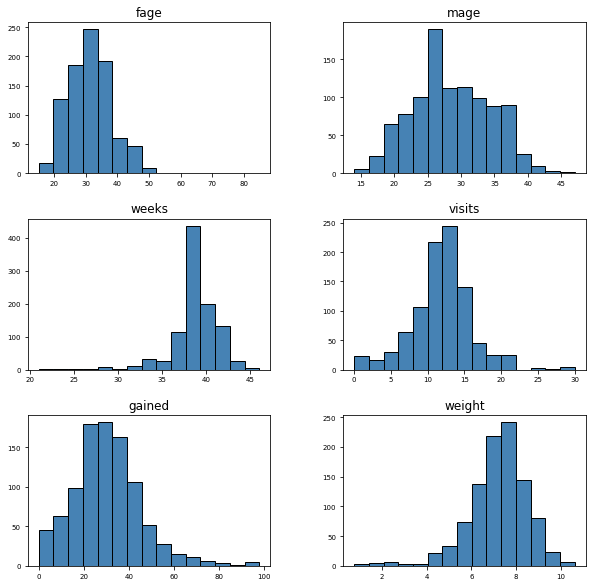

In [13]:
df.hist(bins = 15, color = "steelblue", edgecolor = "black", linewidth = 1.0, xlabelsize = 7, ylabelsize = 7, grid = False, figsize = (10,10))
plt.show()

#### Now, we will look into the dataset to see which are oject to convert to the numeric values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            886 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           1000 non-null   int64  
 4   premie          1000 non-null   object 
 5   visits          944 non-null    float64
 6   gained          958 non-null    float64
 7   weight          1000 non-null   float64
 8   lowbirthweight  1000 non-null   object 
 9   sex             1000 non-null   object 
 10  habit           981 non-null    object 
 11  marital         1000 non-null   object 
 12  whitemom        1000 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


In [5]:
from sklearn import preprocessing
from collections import defaultdict
dic = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: dic[x.name].fit_transform(x))

#Converting the categorical columns using the encoding
for x in list(dic.keys()):
    df[x] = dic[x].transform(df[x])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            886 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   int64  
 3   weeks           1000 non-null   int64  
 4   premie          1000 non-null   int64  
 5   visits          944 non-null    float64
 6   gained          958 non-null    float64
 7   weight          1000 non-null   float64
 8   lowbirthweight  1000 non-null   int64  
 9   sex             1000 non-null   int64  
 10  habit           1000 non-null   int64  
 11  marital         1000 non-null   int64  
 12  whitemom        1000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 101.7 KB


In [7]:
#checking the data 
df.head()

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit,marital,whitemom
0,34.0,34,1,37,0,14.0,28.0,6.96,1,1,0,0,1
1,36.0,31,1,41,0,12.0,41.0,8.86,1,0,0,0,1
2,37.0,36,0,37,0,10.0,28.0,7.51,1,0,0,0,0
3,NaN,16,1,38,0,NaN,29.0,6.19,1,1,0,1,1
4,32.0,31,1,36,1,12.0,48.0,6.75,1,0,0,0,1


In [8]:
# filling the missing data
df.fillna(df.median(), inplace = True)

In [9]:
df.isnull().sum()

fage              0
mage              0
mature            0
weeks             0
premie            0
visits            0
gained            0
weight            0
lowbirthweight    0
sex               0
habit             0
marital           0
whitemom          0
dtype: int64

We are trying to predict if the baby will be low birth or not  so lowbirthweight will be our variable that we want to predict. We will create new data frame with all the variables except the dependent variable.

In [10]:
target = df['lowbirthweight']
independent = df.drop(columns = ['lowbirthweight'])

Here, the target is the dataframe with just the target variable lowbirthweight and independent is the dataframe without the target variable.

<AxesSubplot:xlabel='fage', ylabel='Density'>

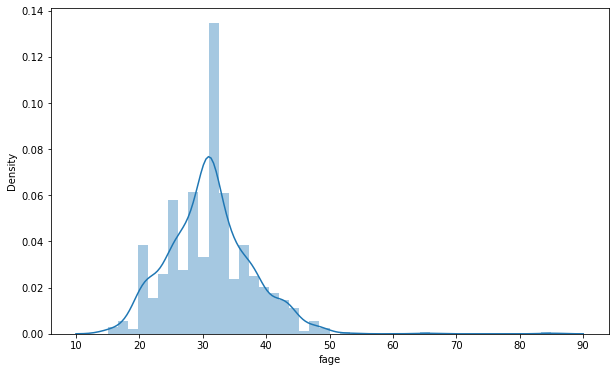

In [61]:
# Distribution plot to see the skewness of the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10,6))
sns.distplot(df.fage)

<AxesSubplot:xlabel='visits', ylabel='Density'>

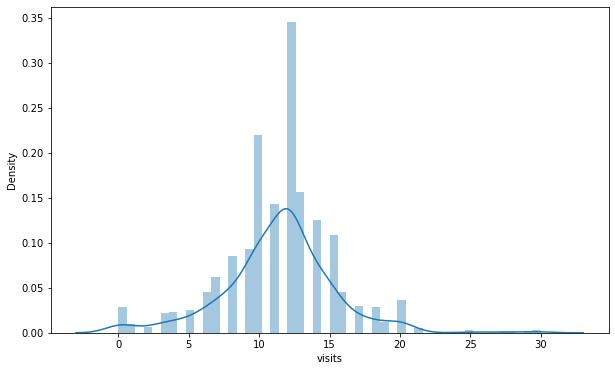

In [62]:
fig, ax = plt.subplots(figsize =(10,6))
sns.distplot(df.visits)

<AxesSubplot:xlabel='gained', ylabel='Density'>

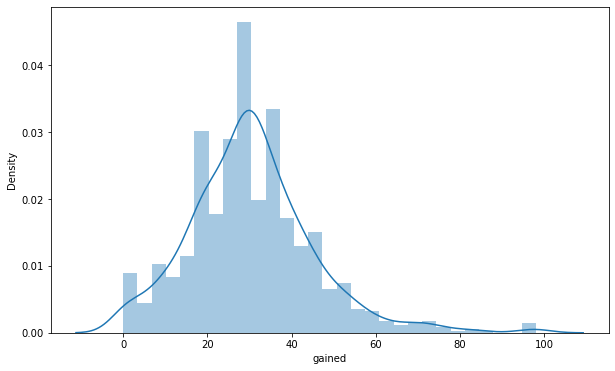

In [63]:
fig, ax = plt.subplots(figsize =(10,6))
sns.distplot(df.gained)

Fage, visits and gained data is little skewed so we will use median to fill the missing values.

In [17]:
# Lets look at the dataframe for features i.e independent
independent.head()

,fage,mage,mature,weeks,premie,visits,gained,weight,sex,habit,marital,whitemom
0,34.0,34,1,37,0,14.0,28.0,6.96,1,0,0,1
1,36.0,31,1,41,0,12.0,41.0,8.86,0,0,0,1
2,37.0,36,0,37,0,10.0,28.0,7.51,0,0,0,0
3,31.0,16,1,38,0,12.0,29.0,6.19,1,0,1,1
4,32.0,31,1,36,1,12.0,48.0,6.75,0,0,0,1


We will use some techniques for feature selection

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(independent,target)


RandomForestClassifier()

In [48]:
feature_imp = pd.DataFrame(rfc.feature_importances_, columns = ['RF_Value'], index = independent.columns)
feature_imp = feature_imp.reset_index()

In [49]:
feature_imp.sort_values(['RF_Value'], ascending = 0)

,index,RF_Value
7,weight,0.675066
3,weeks,0.118978
4,premie,0.066919
5,visits,0.030589
6,gained,0.028004
1,mage,0.027362
0,fage,0.023058
9,habit,0.011839
10,marital,0.005578
8,sex,0.005341


Here we have different features with the importance value. Weight has the highest value because it is the weight of the baby at birth.It will be omitted from the dataset as it is showing same observation as lowbirthweight. 

Looking at the correlation matrix

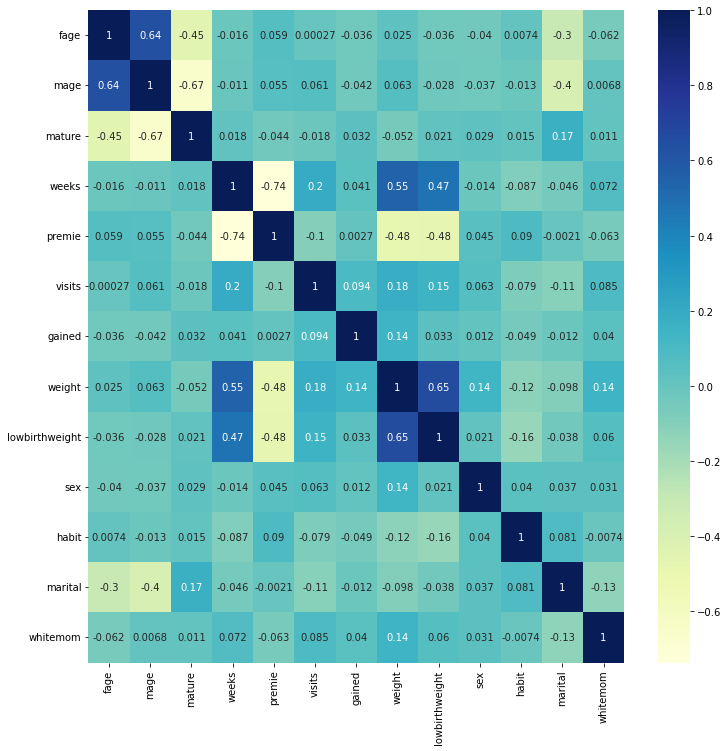

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Weight has high correlation and will be removed from the data because it might cause the overfitting in the modelling.

Using the recursive feature elimination

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
rfe = RFE(lgr, 8)
fit = rfe.fit(independent, target)

In [51]:
selected_feature = pd.DataFrame(rfe.support_, columns = ['RFE_Selected'], index = independent.columns)
selected_feature = selected_feature.reset_index()
selected_feature[selected_feature['RFE_Selected'] == True]

,index,RFE_Selected
2,mature,True
3,weeks,True
4,premie,True
5,visits,True
7,weight,True
8,sex,True
9,habit,True
10,marital,True


Using ExtraTreesClassifier to fit a number of randomized decision trees to the data and is a from of ensemble learning

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

model1 = ExtraTreesClassifier()
model1.fit(independent, target)
ext = pd.DataFrame(model1.feature_importances_, columns = ["ExtraTree_Value"], index=independent.columns)
ext =ext.reset_index()
ext.sort_values(['ExtraTree_Value'], ascending = 0)

,index,ExtraTree_Value
7,weight,0.434552
4,premie,0.143632
3,weeks,0.105350
5,visits,0.059456
6,gained,0.055640
0,fage,0.055568
1,mage,0.052225
9,habit,0.030102
8,sex,0.019932
10,marital,0.018870


Using Lasso Regression for feature selection

In [53]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(independent, target)
model2 = SelectFromModel(lsvc,prefit=True)
l1 = pd.DataFrame(model2.get_support(), columns = ["L1"], index=independent.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True]

,index,L1
0,fage,True
1,mage,True
3,weeks,True
6,gained,True
7,weight,True


Combining the results together

In [55]:
from functools import reduce
all_df = [feature_imp, selected_feature, ext, l1]
result = reduce(lambda left,right: pd.merge(left,right,on='index'), all_df)
result

,index,RF_Value,RFE_Selected,ExtraTree_Value,L1
0,fage,0.023058,False,0.055568,True
1,mage,0.027362,False,0.052225,True
2,mature,0.003209,True,0.011764,False
3,weeks,0.118978,True,0.105350,True
4,premie,0.066919,True,0.143632,False
5,visits,0.030589,True,0.059456,False
6,gained,0.028004,False,0.055640,True
7,weight,0.675066,True,0.434552,True
8,sex,0.005341,True,0.019932,False
9,habit,0.011839,True,0.030102,False


Contructing a table for total score

In [65]:
columns = ['RF_Value', 'ExtraTree_Value']
table = pd.DataFrame({},[])
table['index'] = result['index']
for x in columns:
    table[x] = result['index'].isin(list(result.nlargest(6,x)['index'])).astype(int)

table['RFE_Selected'] = result['RFE_Selected'].astype(int)
table['L1'] = result['L1'].astype(int)

table['Total'] = table.sum(axis=1)
table.sort_values('Total', ascending =0)

    

,index,RF_Value,ExtraTree_Value,RFE_Selected,L1,Total
3,weeks,1,1,1,1,4
7,weight,1,1,1,1,4
4,premie,1,1,1,0,3
5,visits,1,1,1,0,3
6,gained,1,1,0,1,3
0,fage,0,1,0,1,2
1,mage,1,0,0,1,2
2,mature,0,0,1,0,1
8,sex,0,0,1,0,1
9,habit,0,0,1,0,1


The above table shows what the important feature are that are related to the lowbirthweight. My aim was to find if the smoking habit cause the low bith weight but after looking at the table construted above we can tell that habit have low contribution to the low birth weight and other facotors are involved in this process. 

I will be now looking into creating the model that predicts if the baby will be low bith weight on the basis of different factors present in the data set but will be dropping whitemom and maritial column form the dataset. 

In [66]:
#Looking at our dataframe
df.head()

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit,marital,whitemom
0,34.0,34,1,37,0,14.0,28.0,6.96,1,1,0,0,1
1,36.0,31,1,41,0,12.0,41.0,8.86,1,0,0,0,1
2,37.0,36,0,37,0,10.0,28.0,7.51,1,0,0,0,0
3,31.0,16,1,38,0,12.0,29.0,6.19,1,1,0,1,1
4,32.0,31,1,36,1,12.0,48.0,6.75,1,0,0,0,1


In [69]:
#dropping column marital and whitemom after performing feature selection
df.drop(["marital","whitemom"], axis =1, inplace = True)

In [70]:
df

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit
0,34.0,34,1,37,0,14.0,28.0,6.96,1,1,0
1,36.0,31,1,41,0,12.0,41.0,8.86,1,0,0
2,37.0,36,0,37,0,10.0,28.0,7.51,1,0,0
3,31.0,16,1,38,0,12.0,29.0,6.19,1,1,0
4,32.0,31,1,36,1,12.0,48.0,6.75,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,28.0,24,1,39,0,12.0,20.0,6.49,1,1,2
996,37.0,31,1,38,0,8.0,33.0,5.80,1,0,0
997,27.0,27,1,34,1,7.0,25.0,6.75,1,0,0
998,31.0,33,1,42,0,0.0,13.0,7.44,1,1,0


* Now we will use the remaining features to develop our model

In [81]:
# splitting the data in training and test 
X = df.drop(columns = ['lowbirthweight'])
y = df['lowbirthweight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60, train_size = .8)
print( '---Shape of Splits---')
print('X train:{}'.format(X_train.shape))
print('X test:{}'.format(X_test.shape))
print('y train:{}'.format(y_train.shape))
print('y test:{}'.format(y_test.shape))

---Shape of Splits---
X train:(800, 10)
X test:(200, 10)
y train:(800,)
y test:(200,)


Scaling the data before feeding to the model. It helps to reduce the effect of the outlier in the model's prediction.

In [127]:
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Developing the model using the final dataset for test and train

#### 1. Logistic Regression Model

In [88]:
# Building the Logistic Regression Model
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)

# testing the model and displaying the score
score = model_1.score(X_test,y_test)
print(score)

0.99


In [90]:
# looking at the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: ', accuracy)


Accuracy score:  0.99


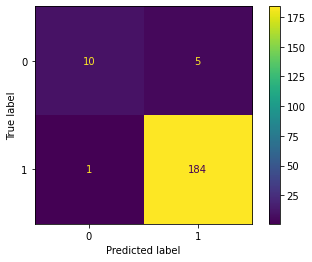

In [139]:
# calculating the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# showing the matrix
plt.show()


Classification report is used to measure the quality of predictions from a classification algorithm. We will display the classification report for the model. 


In [107]:
# displaying the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.99      1.00      0.99       185

    accuracy                           0.99       200
   macro avg       0.99      0.93      0.96       200
weighted avg       0.99      0.99      0.99       200



#### 2. RandomForestClassifier Model

In [116]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_predic = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predic))


ACCURACY OF THE MODEL:  0.995


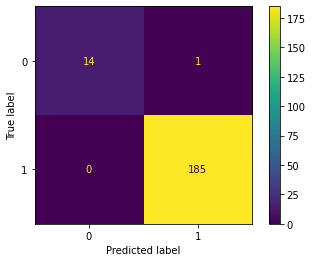

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_predic)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# showing the matrix
plt.show()

In [132]:
# Looking at the model classification report
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       185

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



#### 3. KNN Classification Model

Accuracy score of model is 0.97


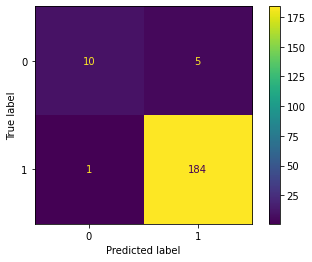

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.97      0.99      0.98       185

    accuracy                           0.97       200
   macro avg       0.94      0.83      0.88       200
weighted avg       0.97      0.97      0.97       200



In [141]:
# creating the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score of model is', ac)

# ploting confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# showing the matrix
plt.show()

# Looking at the model classification report
print(classification_report(y_test, y_pred))